### Dataset-:https://drive.google.com/file/d/104UE7o6Mmp4efIlm-zWpl0jPQ66f9UX5/view?usp=drive_link

In [1]:
#Required Library
import pandas as pd
import numpy as np
import csv
#for Sql 
import sqlite3 as sq
from pathlib import Path
#for visualzation
import matplotlib.pyplot as plt

In [31]:
#create a database because of our tedtalk file is stored in CSV
def db_init():
    db = Path('IND_flight').touch()
    return db
db_init()

In [32]:
path = "./"
database = path + 'IND_flight'
#Make a connection with DB file
conn = sq.connect(database)

In [33]:
#Create table systet
create_table='''CREATE TABLE flights(
ID INTEGER,
airline TEXT,
date_of_journey DATETIME,
source TEXT,
destination TEXT,
dep_time TEXT,
duration TEXT,
total_stop TEXT,
additional_info TEXT,
Price INTEGER
);
'''

In [34]:
#now let's create a cursor for excuting the sql quary on db file
cursor=conn.cursor()
#create a table
cursor.execute(create_table)

In [35]:
# read the content of the file and store it in a list
file = open(r"C:\Users\kumar\Downloads\flights.csv", encoding="utf8")
content = list(csv.reader(file))
# content
# # our file has a header row that needs to be skipped
content = content[1:]
# content
# convert the date to a usable SQLITE format
for i in range(len(content)):
    content[i][2]=str(pd.to_datetime(content[i][2]))
file.close()

In [36]:
content

[['0',
  'Jet Airways',
  '2019-01-03 00:00:00',
  'Banglore',
  'New Delhi',
  '11:40',
  '13h 5m',
  '1 stop',
  'No info',
  '26890'],
 ['1',
  'SpiceJet',
  '2019-01-03 00:00:00',
  'Banglore',
  'New Delhi',
  '15:35',
  '8h 5m',
  '1 stop',
  '1 Long layover',
  '7744'],
 ['2',
  'Jet Airways',
  '2019-01-03 00:00:00',
  'Banglore',
  'New Delhi',
  '8:00',
  '12h 20m',
  '1 stop',
  'No info',
  '27992'],
 ['3',
  'Air India',
  '2019-01-03 00:00:00',
  'Banglore',
  'New Delhi',
  '8:50',
  '39h 5m',
  '2 stops',
  'No info',
  '17135'],
 ['4',
  'Jet Airways',
  '2019-01-03 00:00:00',
  'Banglore',
  'New Delhi',
  '11:40',
  '23h 45m',
  '1 stop',
  'No info',
  '25735'],
 ['5',
  'Air India',
  '2019-01-03 00:00:00',
  'Banglore',
  'New Delhi',
  '10:30',
  '10h 55m',
  '2 stops',
  'No info',
  '11213'],
 ['6',
  'Air India',
  '2019-01-03 00:00:00',
  'Banglore',
  'New Delhi',
  '10:30',
  '7h 15m',
  '2 stops',
  'Change airports',
  '17461'],
 ['7',
  'Air India',
  '2

In [64]:
#insert this data into tedtalk table
insert_table='''INSERT INTO flights 
VALUES(?,?,?,?,?,?,?,?,?,?)'''

#sql cursor
cursor.executemany(insert_table, content)

In [38]:
# show to 5 row in data
pd.read_sql('select * from flights limit 5',conn)

,ID,airline,date_of_journey,source,destination,dep_time,duration,total_stop,additional_info,Price
0,0,Jet Airways,2019-01-03 00:00:00,Banglore,New Delhi,11:40,13h 5m,1 stop,No info,26890
1,1,SpiceJet,2019-01-03 00:00:00,Banglore,New Delhi,15:35,8h 5m,1 stop,1 Long layover,7744
2,2,Jet Airways,2019-01-03 00:00:00,Banglore,New Delhi,8:00,12h 20m,1 stop,No info,27992
3,3,Air India,2019-01-03 00:00:00,Banglore,New Delhi,8:50,39h 5m,2 stops,No info,17135
4,4,Jet Airways,2019-01-03 00:00:00,Banglore,New Delhi,11:40,23h 45m,1 stop,No info,25735


In [39]:
#total number of flight
pd.read_sql('SELECT count(*) FROM flights', conn)


,count(*)
0,10683


In [40]:
# before move forwark let's check distinct value in airline
Al=pd.read_sql('SELECT DISTINCT(airline) FROM flights',conn)
al_count=pd.read_sql('SELECT count(DISTINCT(airline)) FROM flights',conn)
print(Al)
al_count

                              airline
0                         Jet Airways
1                            SpiceJet
2                           Air India
3                              IndiGo
4                            Air Asia
5                             Vistara
6                               GoAir
7                Jet Airways Business
8                   Multiple carriers
9             Vistara Premium economy
10  Multiple carriers Premium economy
11                             Trujet


,count(DISTINCT(airline))
0,12


* 11 unique airline

In [41]:
# unique source 
pd.read_sql('SELECT DISTINCT(source) FROM flights',conn)

,source
0,Banglore
1,Chennai
2,Delhi
3,Kolkata
4,Mumbai


In [42]:
# unique destination 
pd.read_sql('SELECT DISTINCT(destination) FROM flights',conn)

,destination
0,New Delhi
1,Kolkata
2,Cochin
3,Banglore
4,Hyderabad
5,Delhi


In [43]:
# Total revenue each airline
pd.read_sql('SELECT airline,sum(price) as Revenue FROM flights group by airline order by Revenue DESC LIMIT 5',conn)

,airline,Revenue
0,Jet Airways,44817461
1,Air India,16838841
2,Multiple carriers,13039603
3,IndiGo,11648071
4,Vistara,3734451


In [44]:
# Find the monthname with the most number of flights
pd.read_sql("""
    SELECT strftime('%Y-%m', date_of_journey) as month, COUNT(airline) as TotalAirline
    FROM flights 
    GROUP BY month 
    ORDER BY COUNT(airline) DESC 
""", conn)

,month,TotalAirline
0,2019-06,2536
1,2019-03,2211
2,2019-05,2074
3,2019-09,1406
4,2019-01,1075
5,2019-12,957
6,2019-04,424


In [45]:
# 2. Which week day name has most costly flights

most_costly_day = pd.read_sql('''
    SELECT strftime('%w', date_of_journey) as weekday, AVG(price) as average_price
    FROM flights 
    GROUP BY weekday 
    ORDER BY AVG(price) DESC 
''', conn)
most_costly_day

,weekday,average_price
0,4,9805.088646
1,1,9721.101945
2,0,9556.827684
3,2,8960.452265
4,6,8894.375727
5,5,8556.502220
6,3,7996.290807


In [65]:
# 4. Find list of all flights that depart between 10AM and 2PM from Delhi to Banglore

pd.read_sql("""SELECT *FROM flights
            WHERE source = 'Delhi'
    AND destination = 'Banglore'
    AND strftime('%H:%M', dep_time) BETWEEN '10:00' AND '14:00'""",conn)

,ID,airline,date_of_journey,source,destination,dep_time,duration,total_stop,additional_info,Price


# import Data in sql

In [66]:
from sqlalchemy import create_engine
import pymysql

In [67]:
mydb=pymysql.connect(host='localhost',user='root',password='password')

In [68]:
cursor=mydb.cursor()

In [70]:
# create Database
cursor.execute('CREATE DATABASE IND_MART')

1

In [76]:
order= pd.read_csv('orders_dataset.csv')
customer= pd.read_csv('customers_dataset.csv')
product= pd.read_csv('products_dataset.csv')
payment_mode= pd.read_csv('payment_mode_dataset.csv')
review= pd.read_csv('reviews_dataset.csv')
delivery_status= pd.read_csv('delivery_status_dataset.csv')
seller= pd.read_csv('sellers_dataset.csv')


In [77]:
order.head(2)

,order_id,customer_id,product_id,seller_id,order_date,ship_date,price,freight_value,quantity
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19-09-2017 09:45,24-09-2017 09:45,58.9,13.29,1
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03-05-2017 11:05,08-05-2017 11:05,239.9,19.93,2


In [79]:
product.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [80]:
customer.head(5)

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP


In [83]:
# import data To sql
engine = create_engine('mysql+mysqldb://%s:%s@localhost:%i/%s'
                       %('root',password, 3306,'IND_MART'))

order.to_sql('orders',con=engine)
product.to_sql('product',con=engine)
customer.to_sql('customer',con=engine)
payment_mode.to_sql('payment',con=engine)
delivery_status.to_sql('delivery',con=engine)
review.to_sql('review',con=engine)
seller.to_sql('seller',con=engine)

3095

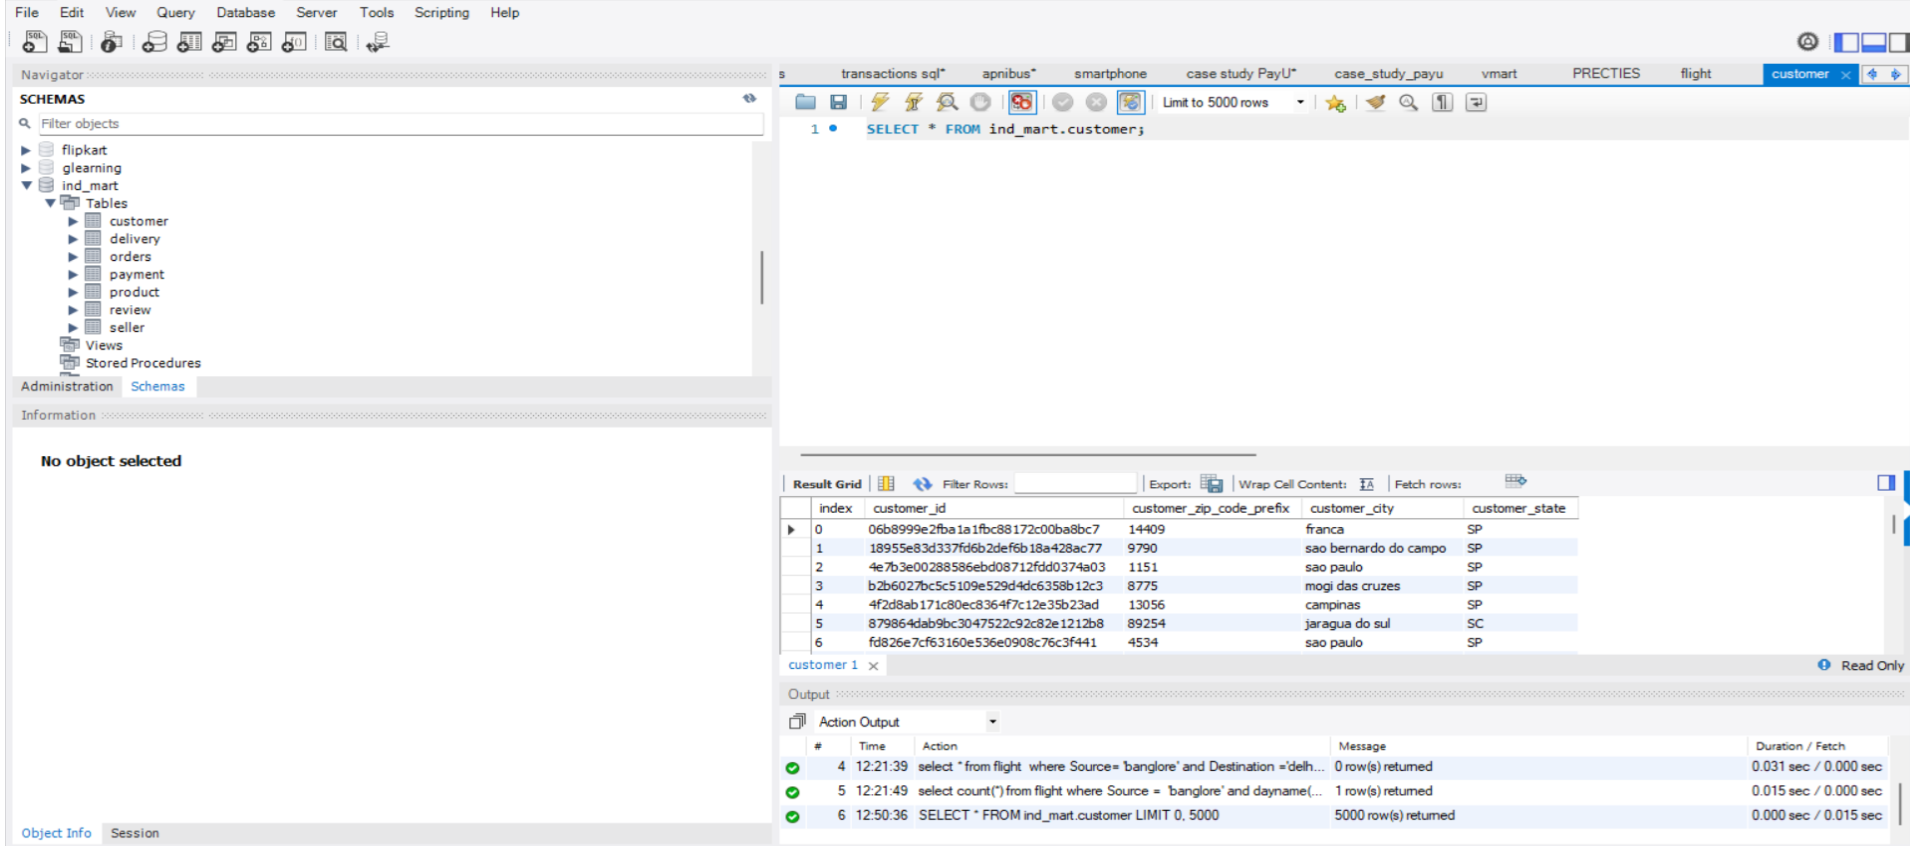

In [84]:
# create Database
cursor.execute('CREATE DATABASE IND_Survey')

1

In [85]:
survey= pd.read_csv('fact_survey_responses.csv')
repondents= pd.read_csv('dim_repondents.csv')
cities= pd.read_csv('dim_cities.csv')


In [87]:
# import data To sql
engine = create_engine('mysql+mysqldb://%s:%s@localhost:%i/%s'
                       %('root',password, 3306,'IND_survey'))

In [88]:
survey.to_sql("survey",con=engine)
repondents.to_sql('repondents',con=engine)
cities.to_sql('cities',con=engine)

10

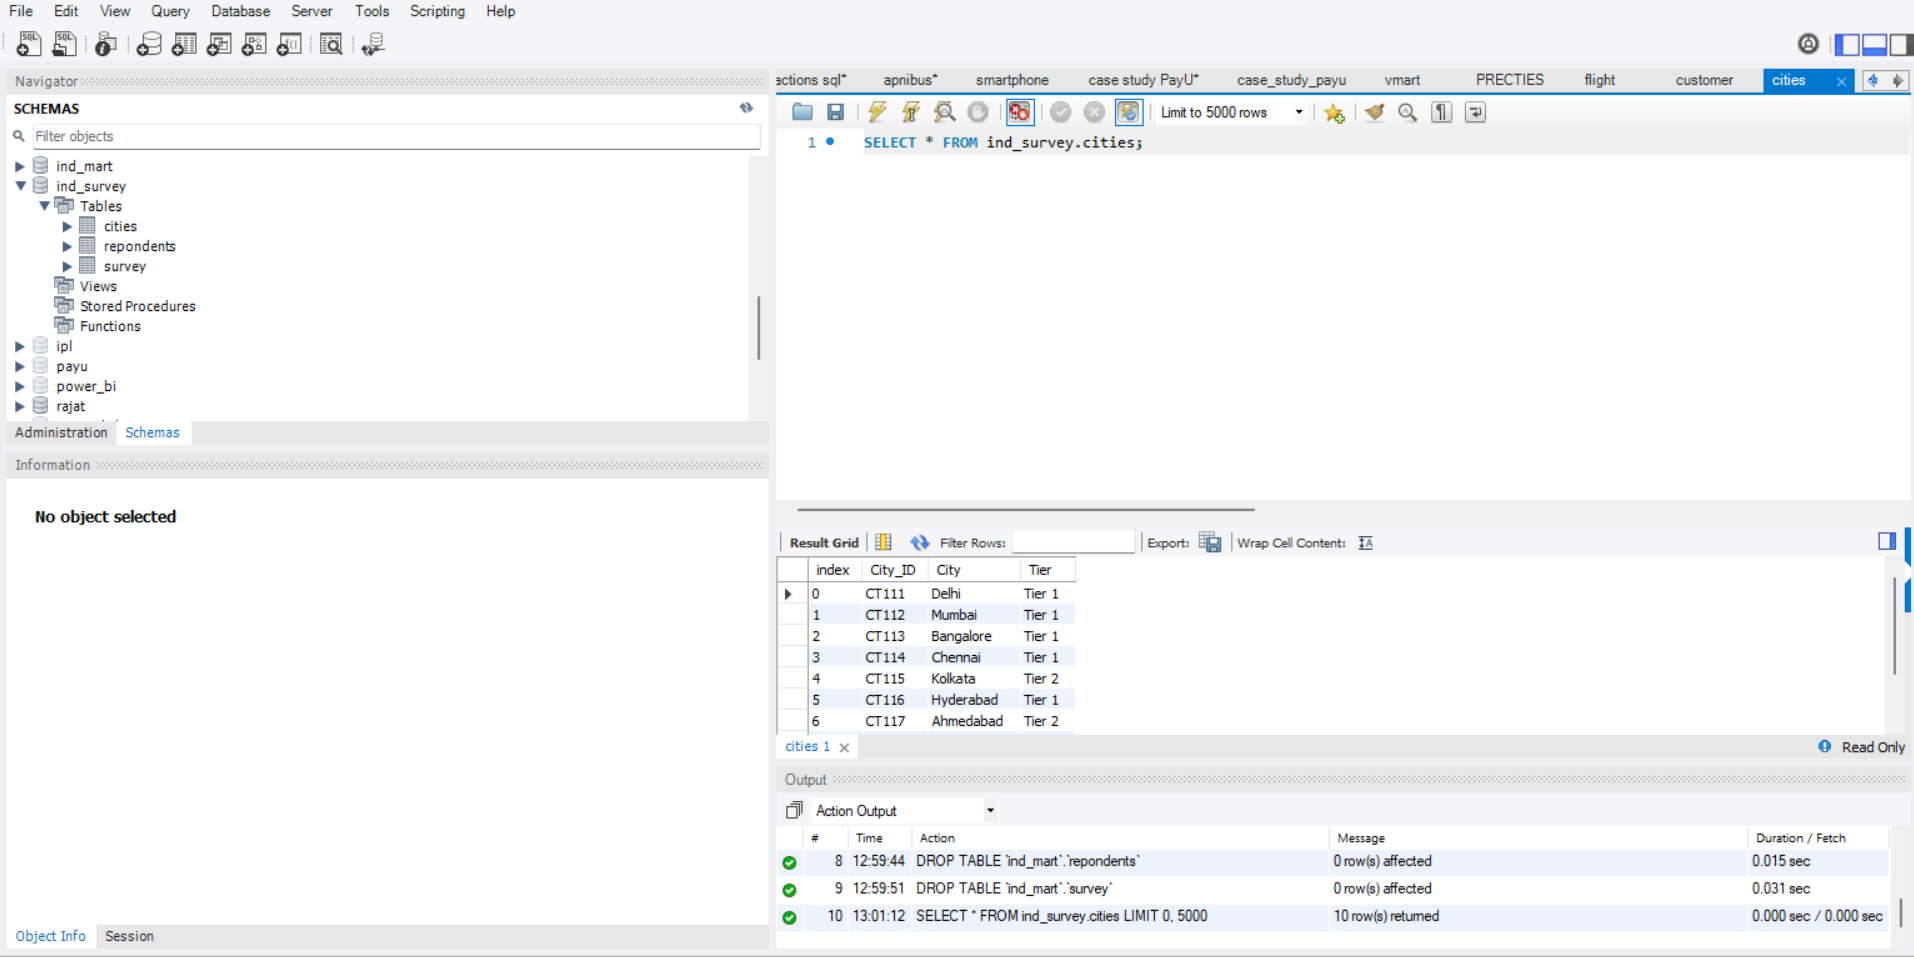